## Importing the libraries

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [22]:
tf.__version__

'2.11.0'

### Data Preprocessing

In [23]:
url=r"C:\Users\Divyansh\Desktop\30 days ml challenge\combined cycle power plant\combined_cycle_power_plant.xlsx"
dataset=pd.read_excel(url)

In [24]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [25]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


# ANN

In [71]:
ann=tf.keras.models.Sequential()

In [99]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [100]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [101]:
ann.add(tf.keras.layers.Dense(units=1))

In [102]:
ann.compile(optimizer="adam",loss="mean_squared_error")

In [122]:
ann.fit(X_train,y_train,batch_size=16,epochs=50)

Epoch 1/50
479/479 [==============================] - 0s 813us/step - loss: 25.5870
Epoch 2/50
479/479 [==============================] - 0s 805us/step - loss: 26.3144
Epoch 3/50
479/479 [==============================] - 0s 805us/step - loss: 25.9392
Epoch 4/50
479/479 [==============================] - 0s 804us/step - loss: 25.4635
Epoch 5/50
479/479 [==============================] - 0s 798us/step - loss: 26.4128
Epoch 6/50
479/479 [==============================] - 0s 803us/step - loss: 25.7886
Epoch 7/50
479/479 [==============================] - 0s 794us/step - loss: 26.0039
Epoch 8/50
479/479 [==============================] - 0s 800us/step - loss: 25.4964
Epoch 9/50
479/479 [==============================] - 0s 818us/step - loss: 25.9011
Epoch 10/50
479/479 [==============================] - 0s 804us/step - loss: 27.1586
Epoch 11/50
479/479 [==============================] - 0s 796us/step - loss: 26.4288
Epoch 12/50
479/479 [==============================] - 0s 801us/step - los

In [123]:
y_pred=ann.predict(X_test)

60/60 [==============================] - 0s 541us/step


In [124]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[431.34 431.23]
 [460.5  460.01]
 [465.39 461.14]
 ...
 [472.44 473.26]
 [437.72 438.  ]
 [457.47 463.28]]


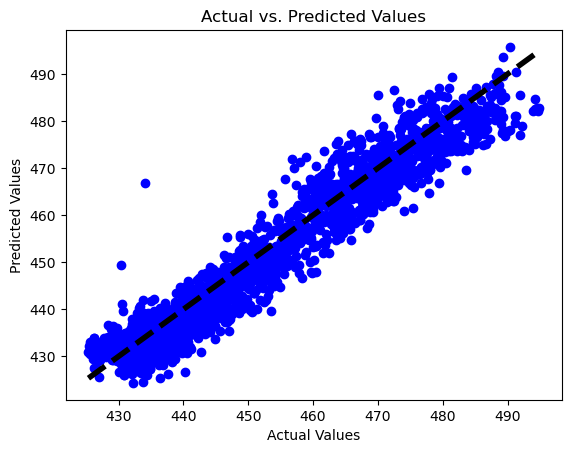

In [125]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred, color='blue')
# Add a line representing y=x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# Add labels and a title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()




In [126]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.027329495199037
